In [1]:
import pandas as pd
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import json
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
client_credentials_manager = spotipy.oauth2.SpotifyClientCredentials(client_id, client_secret)
spotify = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

# Get Momo Asakura information

In [4]:
# search artist and song id
search = spotify.search("麻倉もも", limit=50, offset=0, type='track', market=None)
song = pd.DataFrame.from_dict(search["tracks"]["items"])
song_name = pd.DataFrame(song["name"])
song = pd.DataFrame(song["id"])

# get song information
song_info = pd.DataFrame()
for url in song["id"]:
    df = pd.DataFrame.from_dict(spotify.audio_features(url))
    song_info = song_info.append(df)

# drop unnecessary information 
song_info = song_info.reset_index(drop=True)
song_info = song_info.drop(columns=["analysis_url","id","track_href","type","uri"])

# name concat
song_info_all = pd.concat([song_name, song_info], axis=1)
song_info_all.head(30)

,name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,エイム,0.00827,0.691,215240,0.902,0.000003,6,0.2890,-6.341,1,0.0445,129.982,4,0.775
1,Koino Prelude,0.07270,0.599,269013,0.859,0.000055,8,0.0952,-3.627,0,0.0366,124.017,4,0.646
2,Fanfare!!,0.05310,0.401,245853,0.953,0.000000,1,0.3030,-2.739,1,0.0872,185.133,4,0.628
3,Travely Time,0.09150,0.614,192533,0.877,0.000002,7,0.3630,-3.569,1,0.0275,146.014,4,0.769
4,Tokubetsu Ichiban!!,0.14100,0.662,225867,0.951,0.001030,1,0.3110,-1.964,1,0.0341,94.015,4,0.914
5,Hanani Akai Ito,0.08930,0.477,254627,0.756,0.000115,9,0.1840,-5.311,1,0.0418,169.845,4,0.343
6,Run for You,0.17000,0.652,249200,0.884,0.002700,4,0.1670,-3.392,1,0.0428,154.086,4,0.918
7,Pumpkin Meat Pie,0.01500,0.574,246853,0.933,0.000000,4,0.0892,-3.238,1,0.0619,156.997,4,0.638
8,No Distance,0.11000,0.632,267027,0.827,0.000016,7,0.3340,-3.233,1,0.0394,122.982,4,0.576
9,Colorful,0.02150,0.581,240027,0.941,0.000004,6,0.4100,-2.812,1,0.0594,175.993,4,0.432


# Analysis

In [5]:
song_info.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
count,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.0,14.000000
mean,0.086376,0.578643,251376.142857,0.883786,0.000367,5.571429,0.259314,-3.606429,0.928571,0.048379,141.577500,4.0,0.625929
std,0.060891,0.081325,27254.912390,0.062315,0.000754,2.440501,0.105958,1.099893,0.267261,0.019092,30.534504,0.0,0.221866
min,0.008270,0.401000,192533.000000,0.756000,0.000000,1.000000,0.089200,-6.341000,0.000000,0.027500,94.015000,4.0,0.157000
25%,0.035100,0.554000,241483.500000,0.838000,0.000003,4.000000,0.171250,-3.797250,1.000000,0.034725,123.240750,4.0,0.468000
50%,0.085050,0.590000,251913.500000,0.880500,0.000015,6.500000,0.296000,-3.480500,1.000000,0.042300,143.025500,4.0,0.642000
75%,0.110000,0.630500,268516.500000,0.939000,0.000246,7.000000,0.328250,-2.917250,1.000000,0.061275,166.633000,4.0,0.773500
max,0.217000,0.691000,298280.000000,0.970000,0.002700,9.000000,0.410000,-1.964000,1.000000,0.087200,185.133000,4.0,0.918000


## Acatter plot

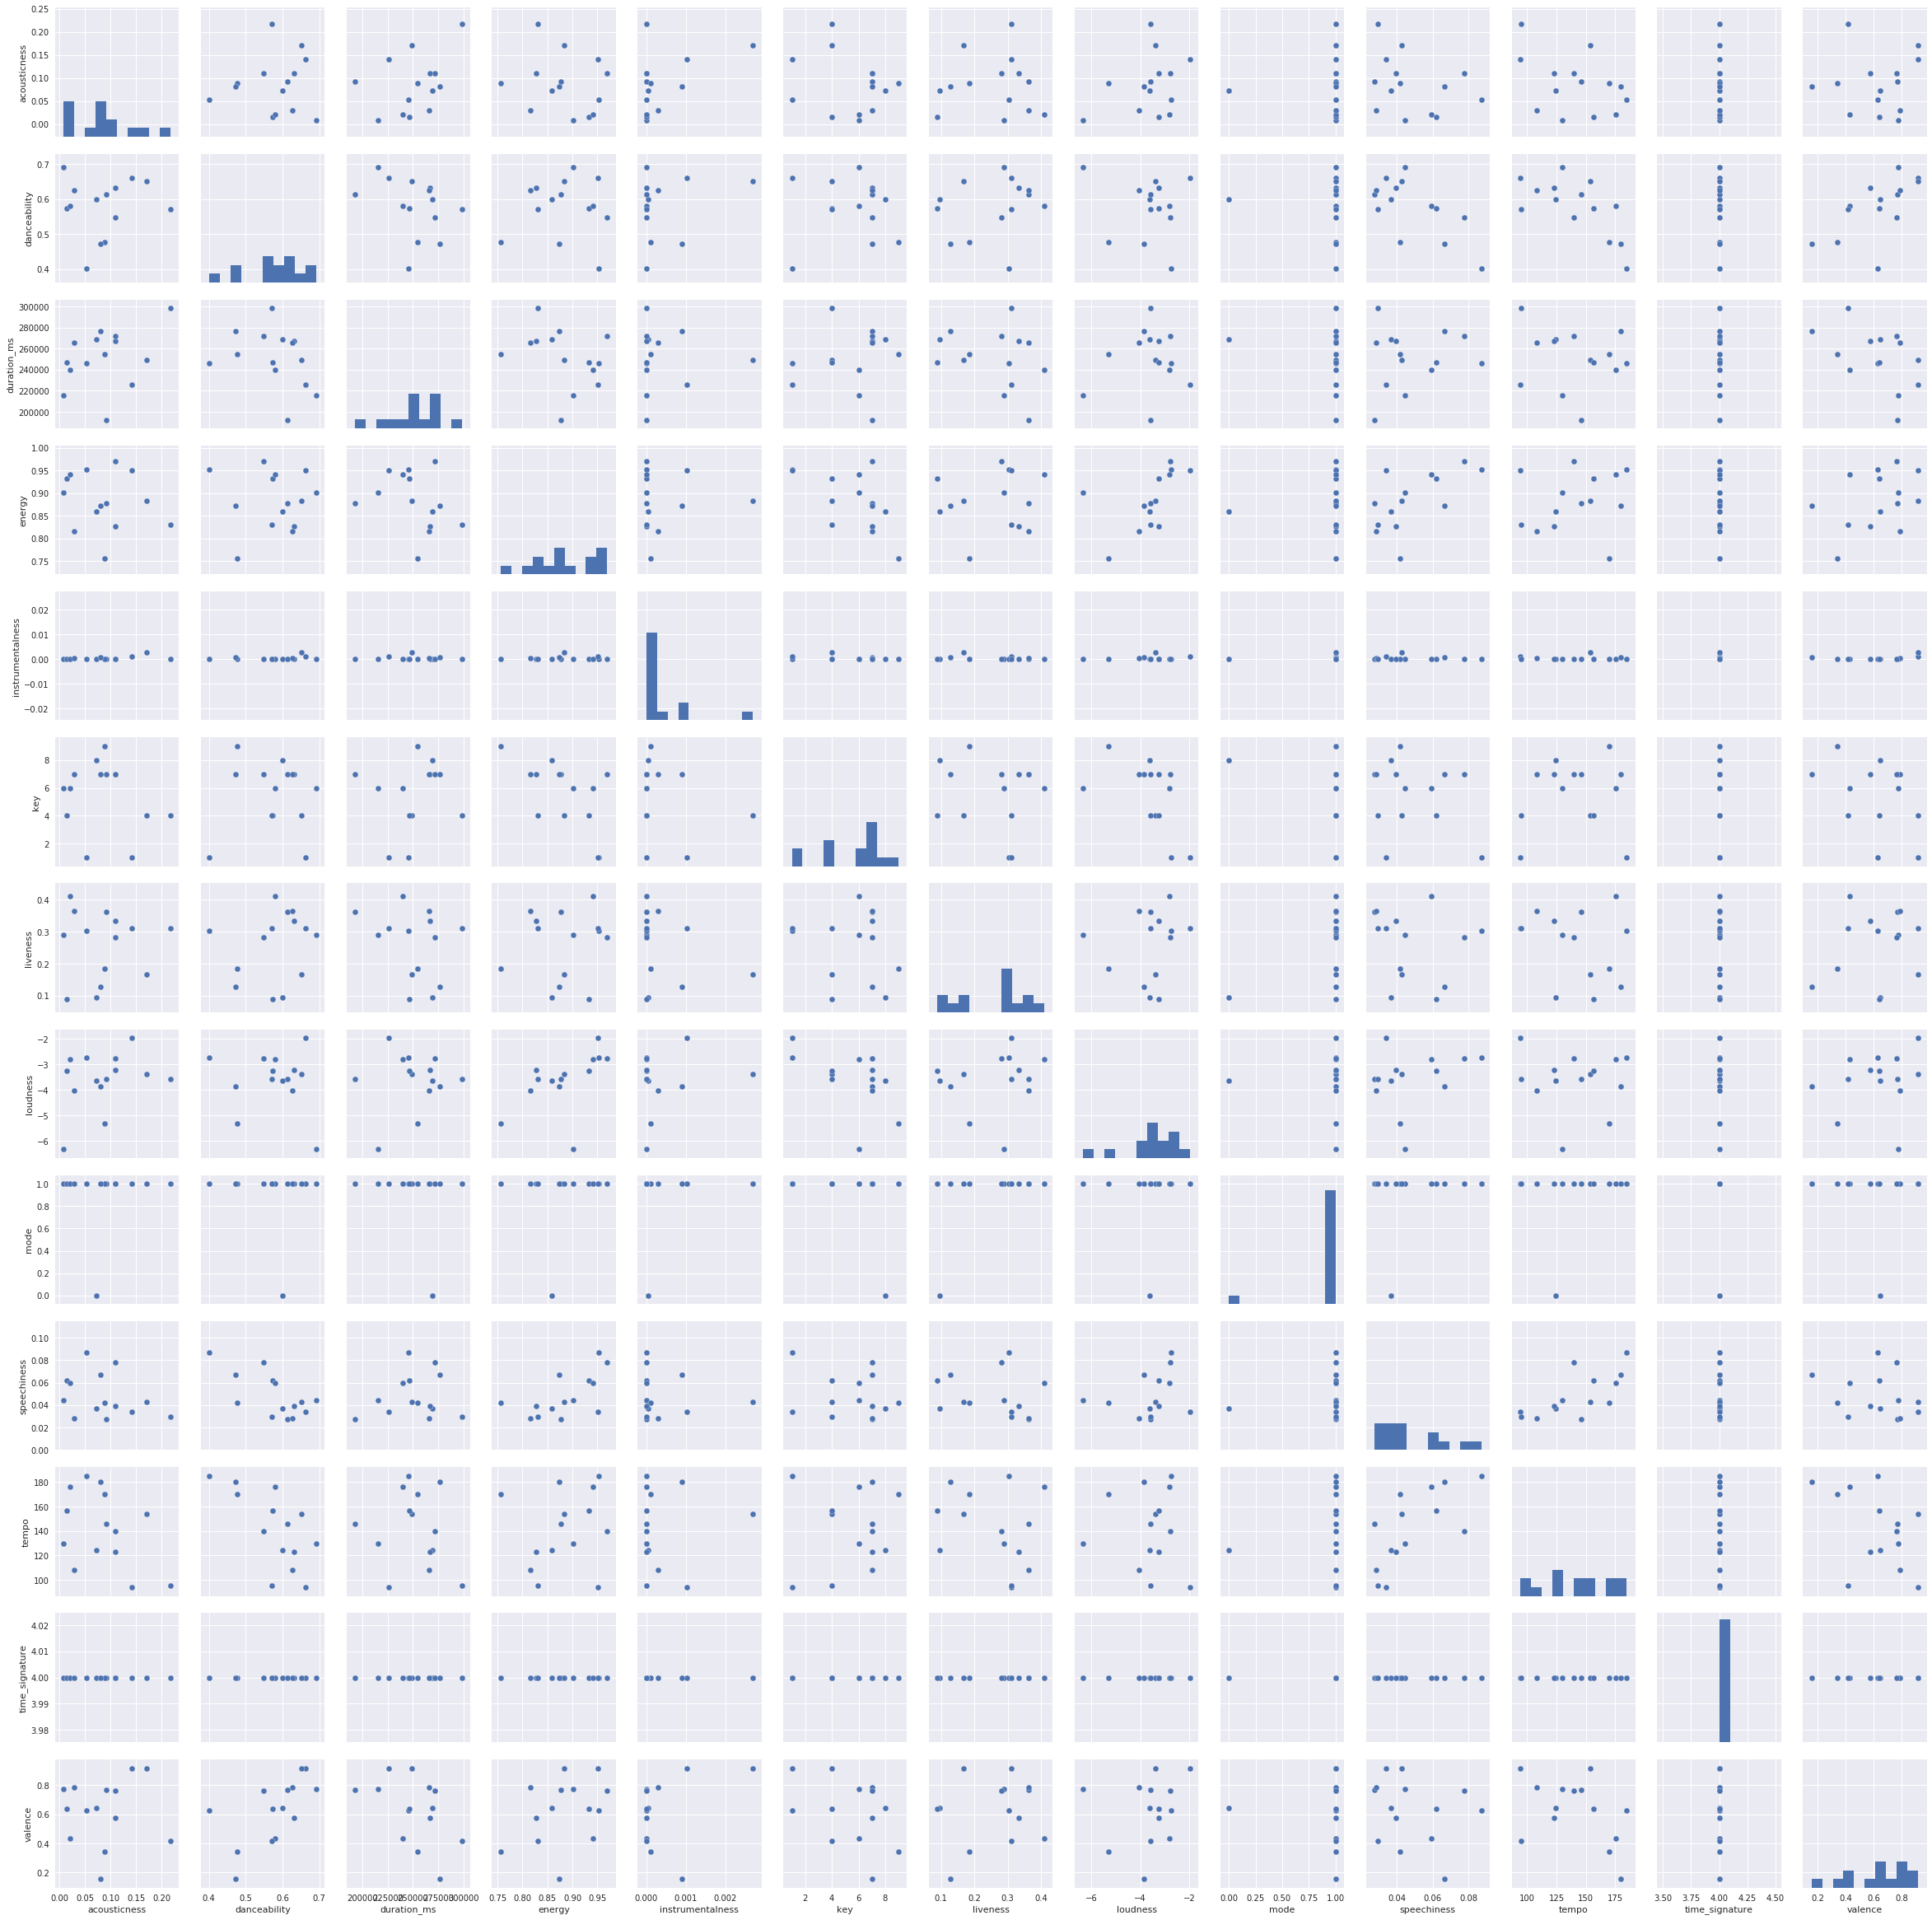

In [6]:
sns.pairplot(song_info)

## Correlation

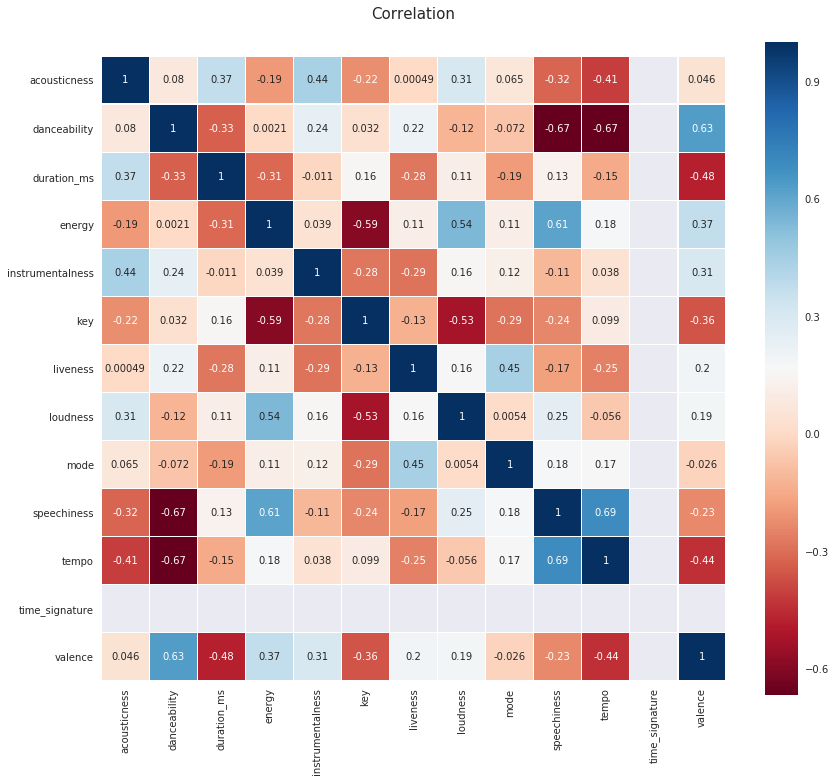

In [7]:
corr_mat = song_info.corr(method='pearson')
plt.figure(figsize=(14,12))
plt.title('Correlation', y=1.05, size=15)
colormap = plt.cm.RdBu
sns.heatmap(corr_mat,
            linewidths=0.1,
            cmap=colormap,
            vmax=1.0, 
            square=True, 
            annot=True)

## Histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4249242c18>,
      dtype=object)

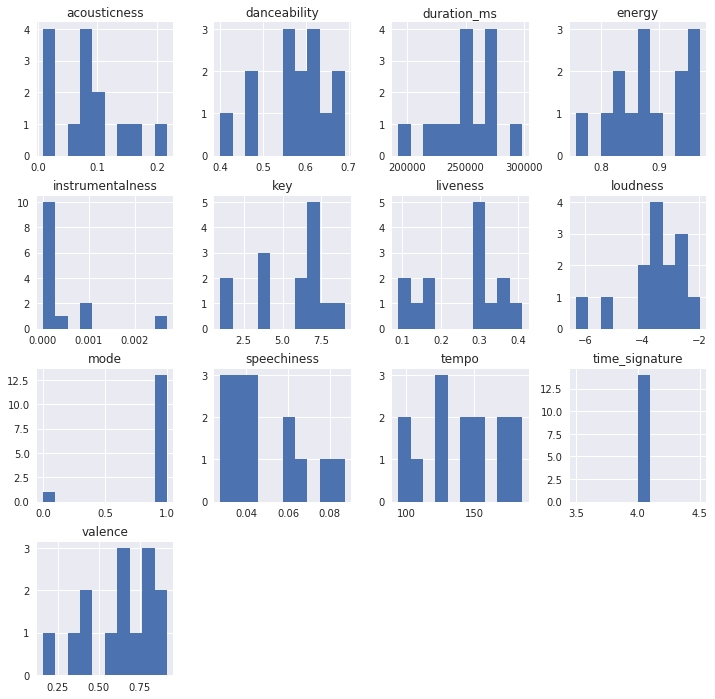

In [8]:
song_info.hist(figsize=(12, 12), bins=10)

## Graph of each data

In [9]:
valence = pd.DataFrame(song_info_all["name"])
valence["valence"] = song_info_all["valence"]
valence.head(20)

,name,valence
0,エイム,0.775
1,Koino Prelude,0.646
2,Fanfare!!,0.628
3,Travely Time,0.769
4,Tokubetsu Ichiban!!,0.914
5,Hanani Akai Ito,0.343
6,Run for You,0.918
7,Pumpkin Meat Pie,0.638
8,No Distance,0.576
9,Colorful,0.432


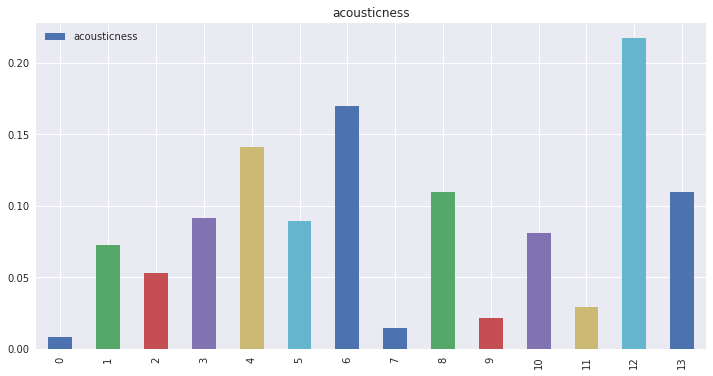

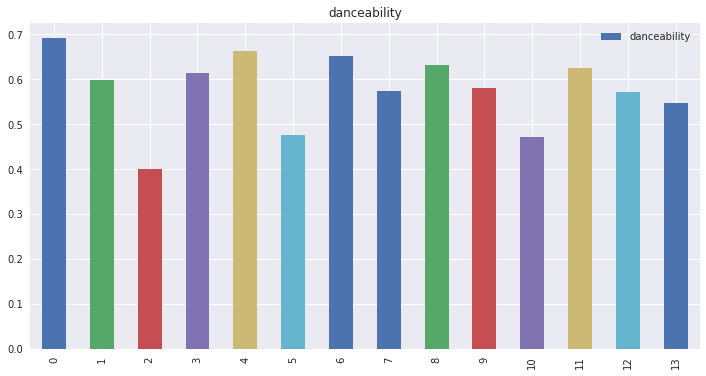

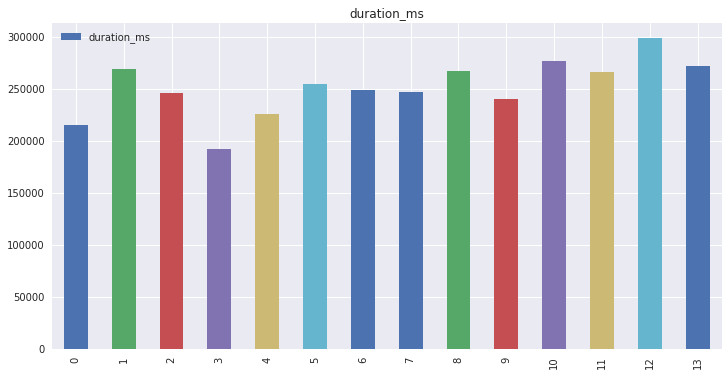

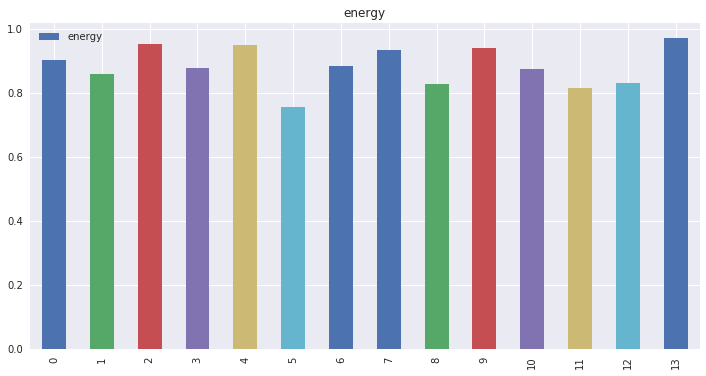

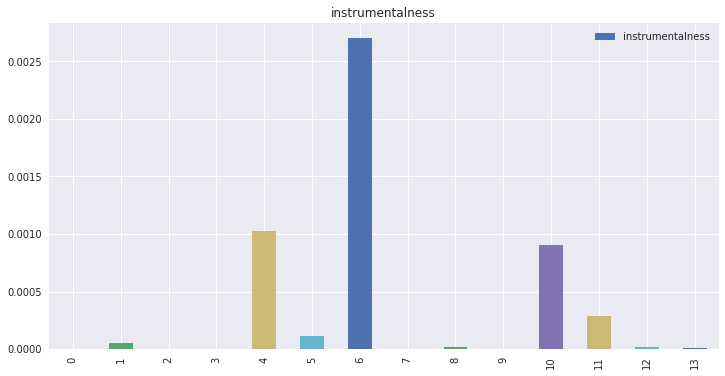

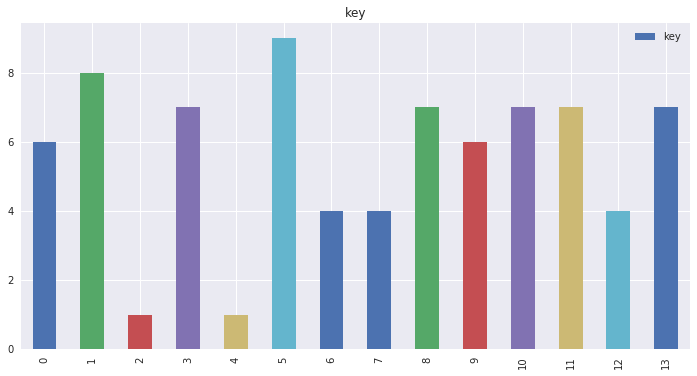

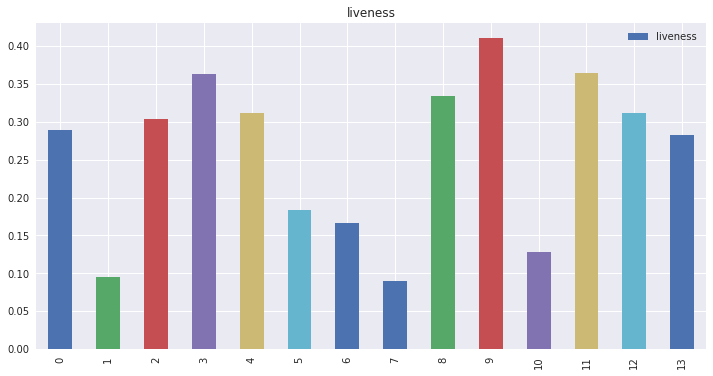

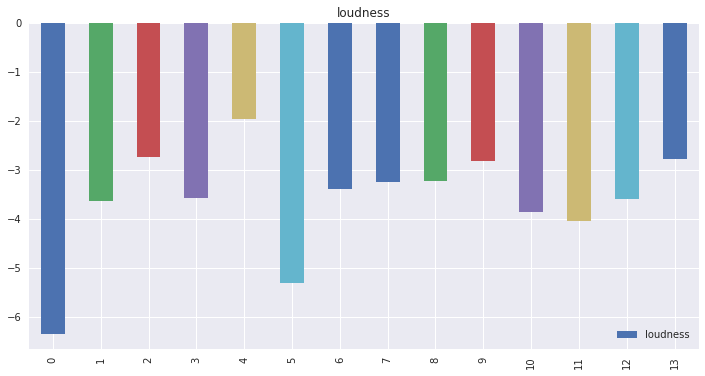

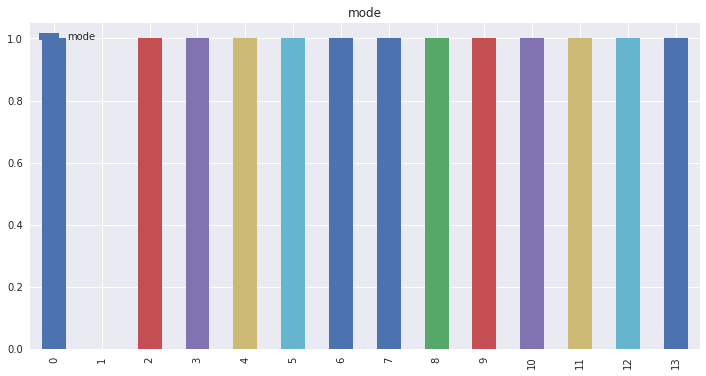

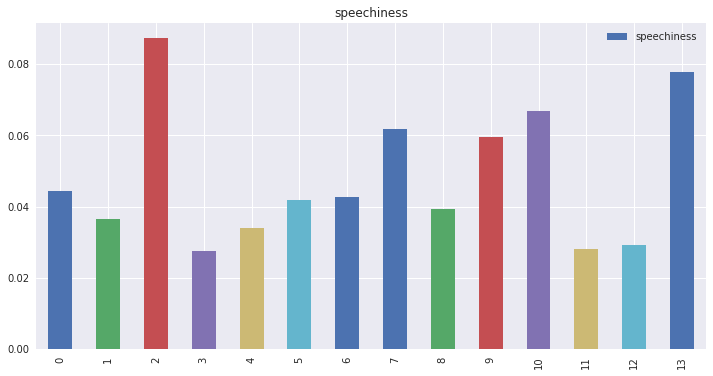

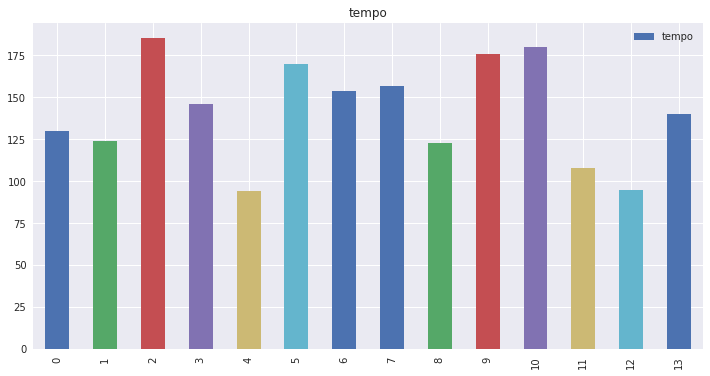

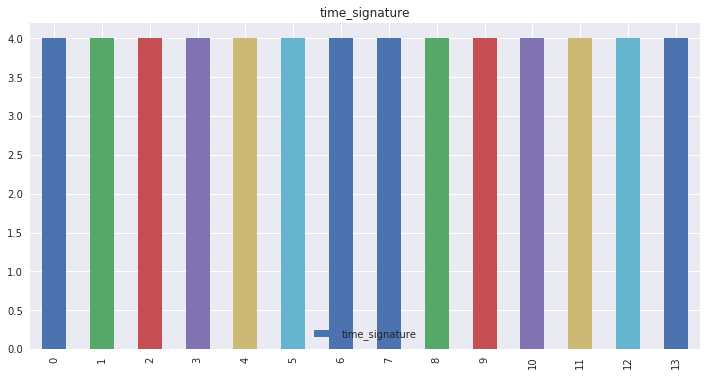

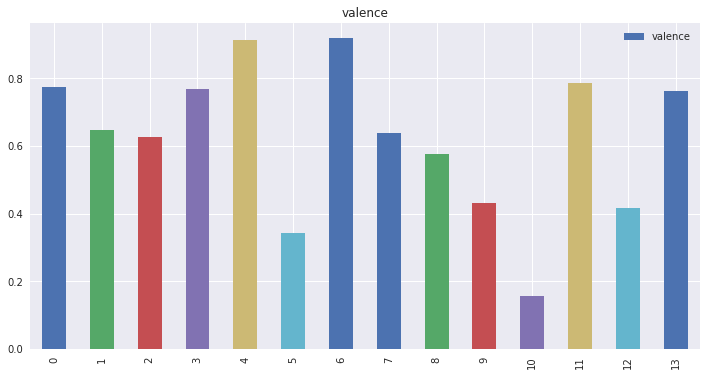

In [10]:
colum_name = ["acousticness", "danceability", "duration_ms", "energy", "instrumentalness", "key", "liveness", "loudness", "mode", "speechiness", "tempo", "time_signature", "valence"]

for name in colum_name:
    song_info.plot.bar(y=name, figsize=(12,6))
    plt.title(name)